In [17]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np	

In [18]:
dataset = pd.read_csv('/Users/farrelmanazilin/Document/kuliah/data/milk.csv')
print('Dataset\n',dataset)

Dataset
        pH  Temprature  Taste  Odor  Fat   Turbidity  Colour   Grade
0     6.6          35      1     0     1          0     254    high
1     6.6          36      0     1     0          1     253    high
2     8.5          70      1     1     1          1     246     low
3     9.5          34      1     1     0          1     255     low
4     6.6          37      0     0     0          0     255  medium
...   ...         ...    ...   ...   ...        ...     ...     ...
1054  6.7          45      1     1     0          0     247  medium
1055  6.7          38      1     0     1          0     255    high
1056  3.0          40      1     1     1          1     255     low
1057  6.8          43      1     0     1          0     250    high
1058  8.6          55      0     1     1          1     255     low

[1059 rows x 8 columns]


In [19]:
dataset = dataset.drop('Grade', axis=1)
dataset

pH  Temprature  Taste  Odor  Fat   Turbidity  Colour
0     6.6          35      1     0     1          0     254
1     6.6          36      0     1     0          1     253
2     8.5          70      1     1     1          1     246
3     9.5          34      1     1     0          1     255
4     6.6          37      0     0     0          0     255
...   ...         ...    ...   ...   ...        ...     ...
1054  6.7          45      1     1     0          0     247
1055  6.7          38      1     0     1          0     255
1056  3.0          40      1     1     1          1     255
1057  6.8          43      1     0     1          0     250
1058  8.6          55      0     1     1          1     255

[1059 rows x 7 columns]

In [20]:
scaler = MinMaxScaler()
dataset_new = scaler.fit_transform(dataset)
print(dataset_new)

[[0.55384615 0.01785714 1.         ... 1.         0.         0.93333333]
 [0.55384615 0.03571429 0.         ... 0.         1.         0.86666667]
 [0.84615385 0.64285714 1.         ... 1.         1.         0.4       ]
 ...
 [0.         0.10714286 1.         ... 1.         1.         1.        ]
 [0.58461538 0.16071429 1.         ... 1.         0.         0.66666667]
 [0.86153846 0.375      0.         ... 1.         1.         1.        ]]


/Users/farrelmanazilin/tomatopotato/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster
2    371
0    366
1    322
Name: count, dtype: int64


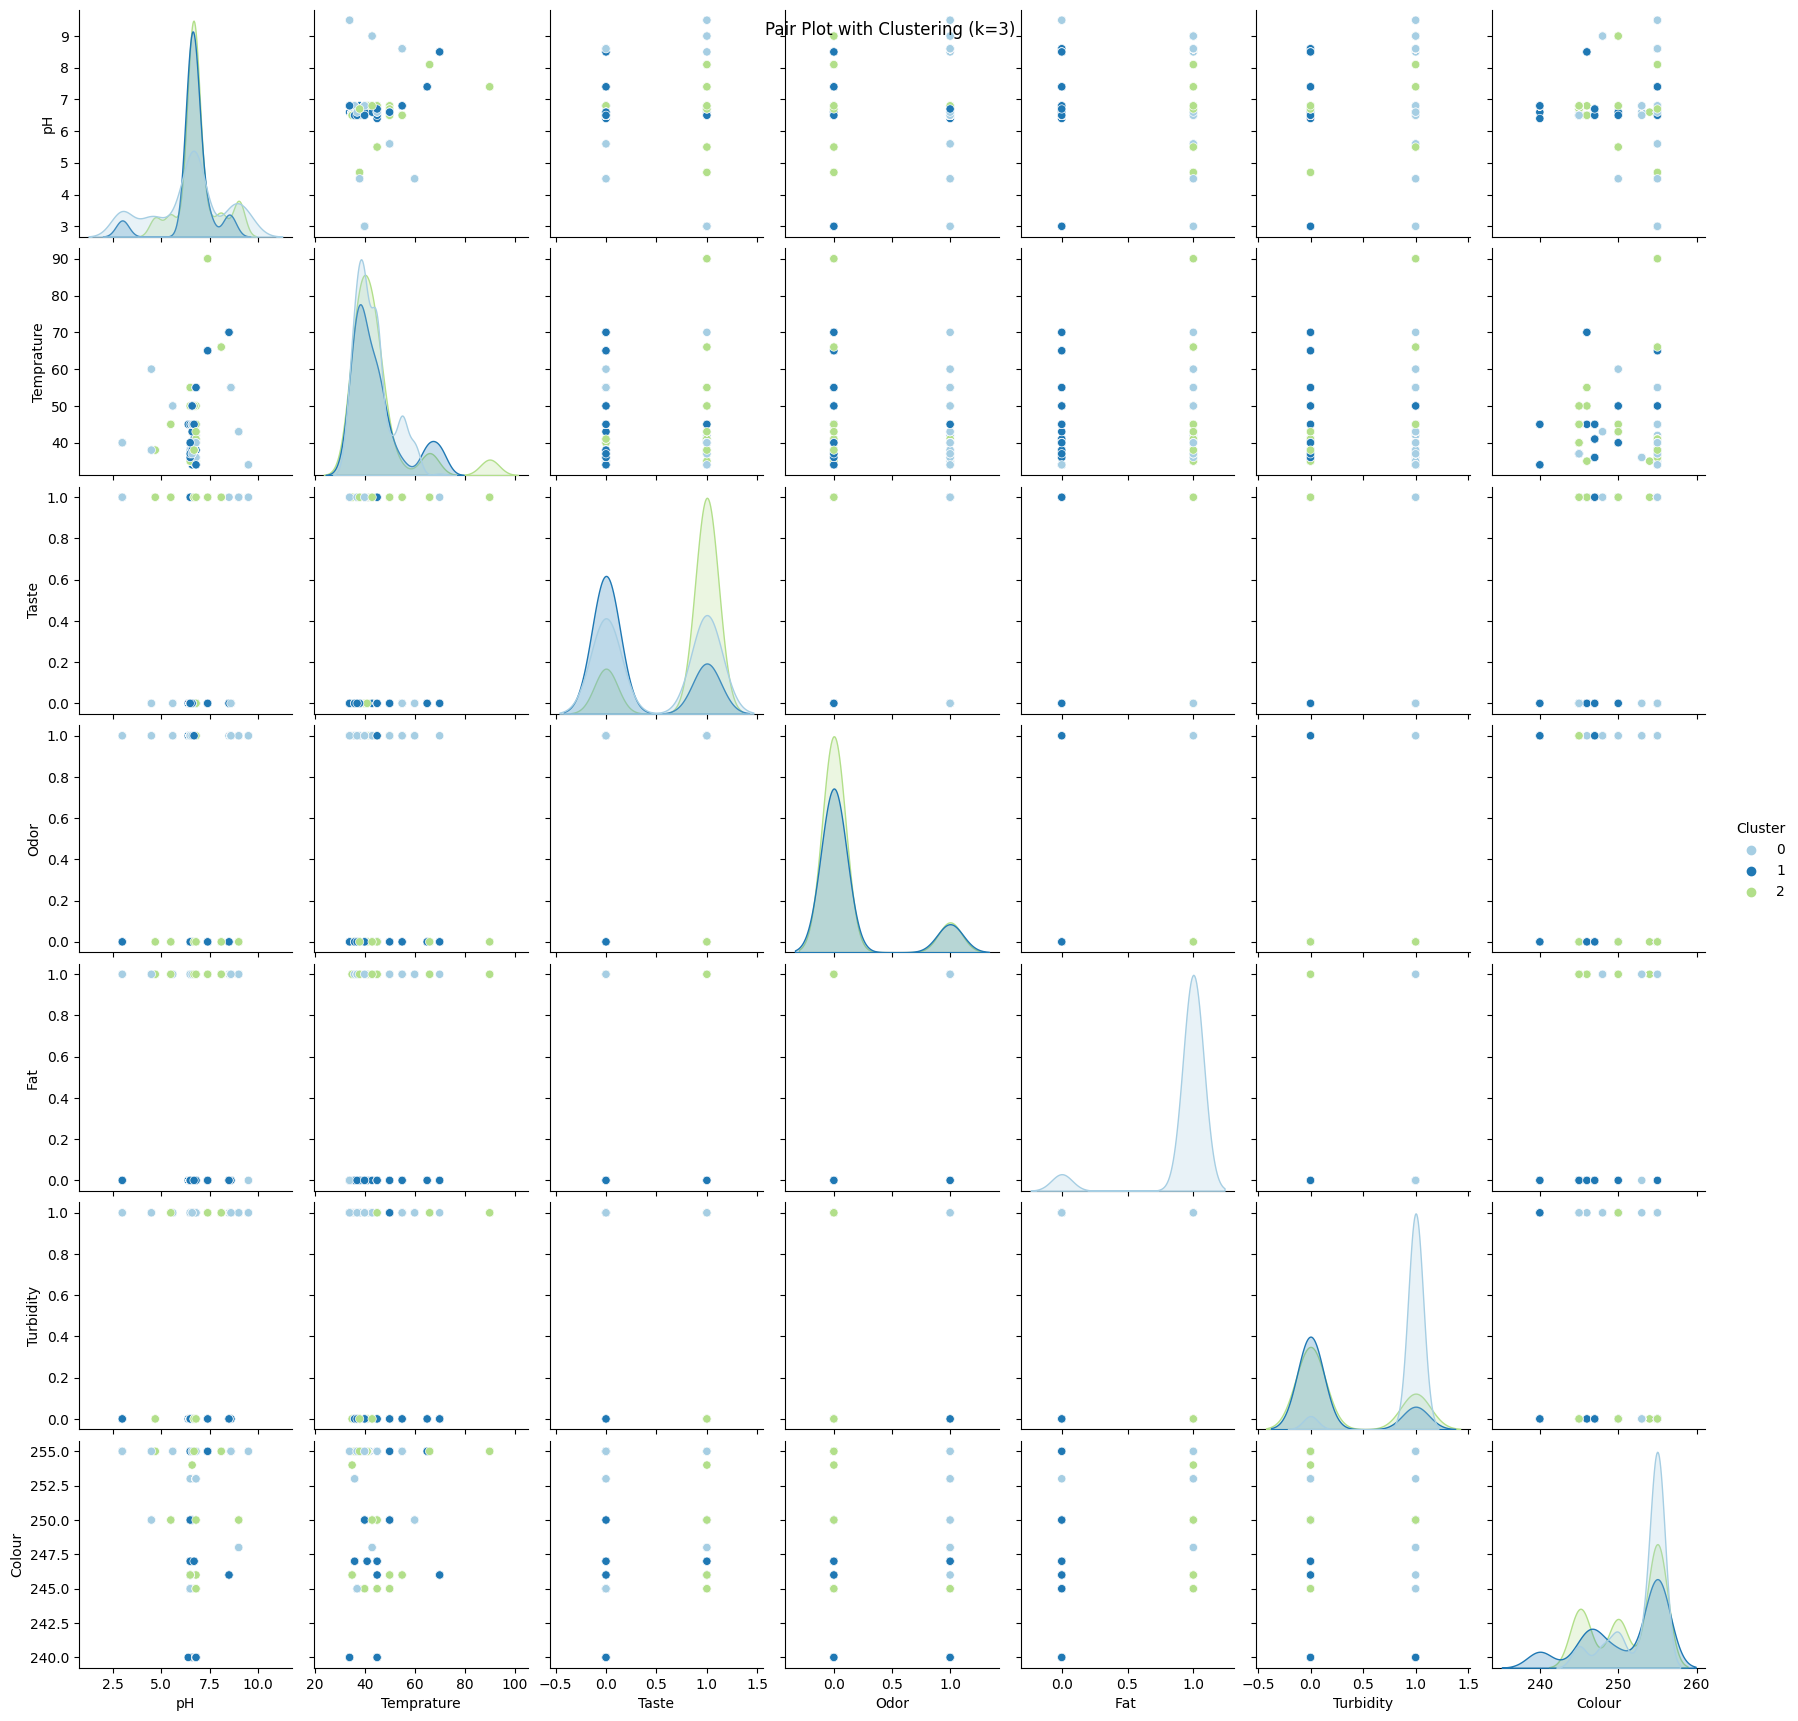

In [21]:
kmeans = KMeans(n_clusters=3, random_state=0)
cluster = kmeans.fit_predict(dataset_new)  
dataset['Cluster'] = cluster
print(dataset['Cluster'].value_counts())

sns.pairplot(data=dataset, hue='Cluster', kind='scatter', palette='Paired')
plt.suptitle('Pair Plot with Clustering (k=3)')
plt.show()

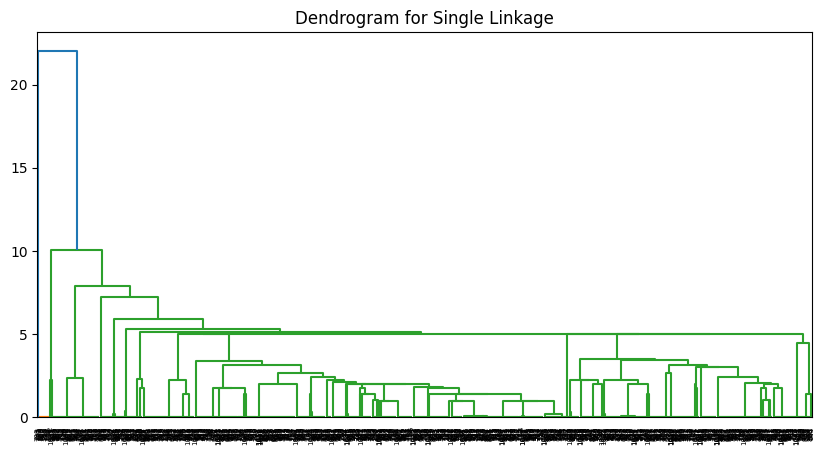

Cluster_Single
3    1020
2      22
1      17
Name: count, dtype: int64


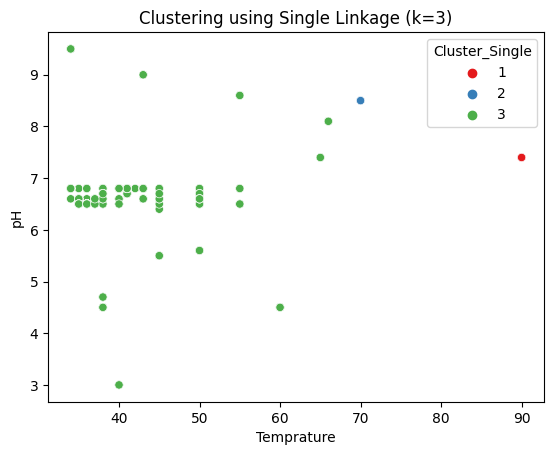

In [22]:
single_linkage = linkage(dataset, method='single')
 
plt.figure(figsize=(10, 5))
dendrogram(single_linkage)
plt.title('Dendrogram for Single Linkage')
plt.show()

single_clusters = fcluster(single_linkage, 3, criterion='maxclust') 
dataset['Cluster_Single'] = single_clusters 
print(dataset['Cluster_Single'].value_counts()) 
sns.scatterplot(data=dataset, x='Temprature', y='pH', hue='Cluster_Single', palette='Set1')
plt.title('Clustering using Single Linkage (k=3)')
plt.show()

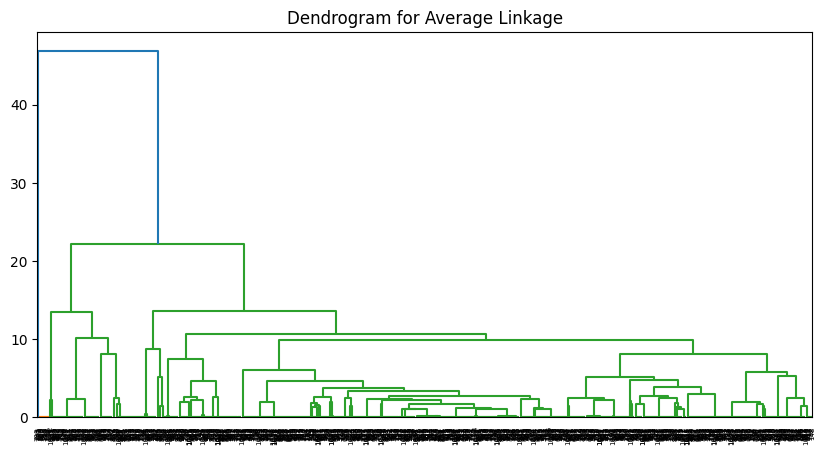

Cluster_Average
3    912
2    130
1     17
Name: count, dtype: int64


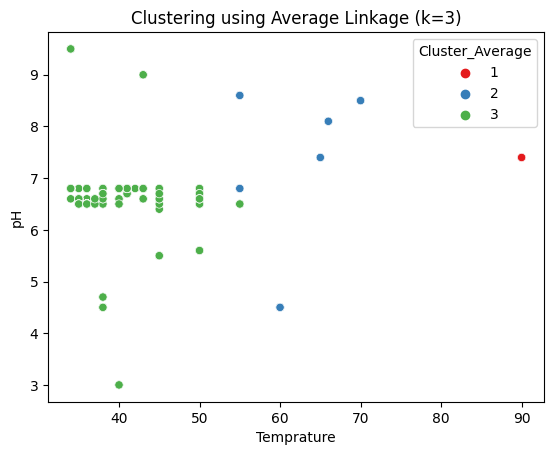

In [23]:
average_linkage = linkage(dataset, method='average') 
plt.figure(figsize=(10, 5))
dendrogram(average_linkage)
plt.title('Dendrogram for Average Linkage')
plt.show() 

average_clusters = fcluster(average_linkage, 3, criterion='maxclust')
dataset['Cluster_Average'] = average_clusters 
print(dataset['Cluster_Average'].value_counts()) 

sns.scatterplot(data=dataset, x='Temprature', y='pH', hue='Cluster_Average', palette='Set1')
plt.title('Clustering using Average Linkage (k=3)')
plt.show()

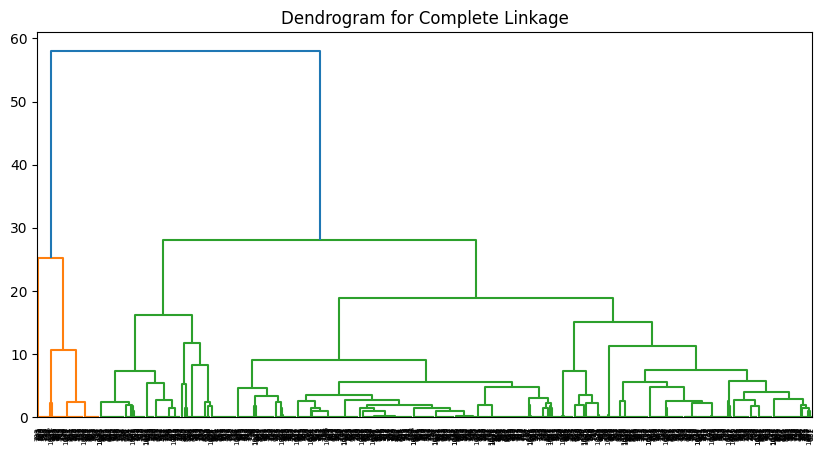

Cluster_Complete
3    787
2    187
1     85
Name: count, dtype: int64


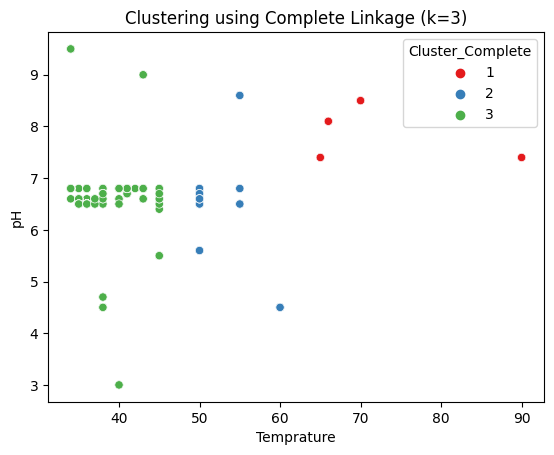

In [24]:
complete_linkage = linkage(dataset, method='complete')

plt.figure(figsize=(10, 5))
dendrogram(complete_linkage)
plt.title('Dendrogram for Complete Linkage')
plt.show()

complete_clusters = fcluster(complete_linkage, 3, criterion='maxclust')
dataset['Cluster_Complete'] = complete_clusters
print(dataset['Cluster_Complete'].value_counts())

sns.scatterplot(data=dataset, x='Temprature', y='pH', hue='Cluster_Complete', palette='Set1')
plt.title('Clustering using Complete Linkage (k=3)')
plt.show()


In [25]:
dataset = pd.read_csv('/Users/farrelmanazilin/Document/kuliah/data/water_potability.csv')
print('Dataset\n',dataset)

Dataset
             ph    Hardness       Solids  Chloramines     Sulfate   
0          NaN  204.890456  20791.31898     7.300212  368.516441  \
1     3.716080  129.422921  18630.05786     6.635246         NaN   
2     8.099124  224.236259  19909.54173     9.275884         NaN   
3     8.316766  214.373394  22018.41744     8.059332  356.886136   
4     9.092223  181.101509  17978.98634     6.546600  310.135738   
...        ...         ...          ...          ...         ...   
3271  4.668102  193.681736  47580.99160     7.166639  359.948574   
3272  7.808856  193.553212  17329.80216     8.061362         NaN   
3273  9.419510  175.762646  33155.57822     7.350233         NaN   
3274  5.126763  230.603758  11983.86938     6.303357         NaN   
3275  7.874671  195.102299  17404.17706     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359  

In [26]:
dataset = dataset.fillna(dataset.groupby("Potability").transform('mean'))
dataset = dataset.drop('Potability', axis=1)
dataset

ph    Hardness       Solids  Chloramines     Sulfate   
0     7.085378  204.890456  20791.31898     7.300212  368.516441  \
1     3.716080  129.422921  18630.05786     6.635246  334.564290   
2     8.099124  224.236259  19909.54173     9.275884  334.564290   
3     8.316766  214.373394  22018.41744     8.059332  356.886136   
4     9.092223  181.101509  17978.98634     6.546600  310.135738   
...        ...         ...          ...          ...         ...   
3271  4.668102  193.681736  47580.99160     7.166639  359.948574   
3272  7.808856  193.553212  17329.80216     8.061362  332.566990   
3273  9.419510  175.762646  33155.57822     7.350233  332.566990   
3274  5.126763  230.603758  11983.86938     6.303357  332.566990   
3275  7.874671  195.102299  17404.17706     7.509306  332.566990   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
0       564.308654       10.379783        86.990970   2.963135  
1       592.885359       15.180013        56.329076   4.500656  
2       418.606213       16.868637        66.420093   3.055934  
3       363.266516       18.436525       100.341674   4.628771  
4       398.410813       11.558279        31.997993   4.075075  
...            ...             ...              ...        ...  
3271    526.424171       13.894419        66.687695   4.435821  
3272    392.449580       19.903225        66.539684   2.798243  
3273    432.044783       11.039070        69.845400   3.298875  
3274    402.883113       11.168946        77.488213   4.708658  
3275    327.459761       16.140368        78.698446   2.309149  

[3276 rows x 9 columns]

In [27]:
scaler = MinMaxScaler()
dataset_new = scaler.fit_transform(dataset)
print(dataset_new)

[[0.50609846 0.57113901 0.33609646 ... 0.31340165 0.69975313 0.28609102]
 [0.26543429 0.29740043 0.30061142 ... 0.49731851 0.4509993  0.57679264]
 [0.57850887 0.64131081 0.32161885 ... 0.56201674 0.5328657  0.30363656]
 ...
 [0.67282217 0.46548556 0.53910122 ... 0.33866167 0.56065454 0.34956996]
 [0.36619735 0.66440723 0.19148981 ... 0.34363779 0.62265916 0.61611996]
 [0.56247653 0.53563505 0.28048408 ... 0.5341137  0.63247754 0.16244074]]


/Users/farrelmanazilin/tomatopotato/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster
0    1664
1    1612
Name: count, dtype: int64


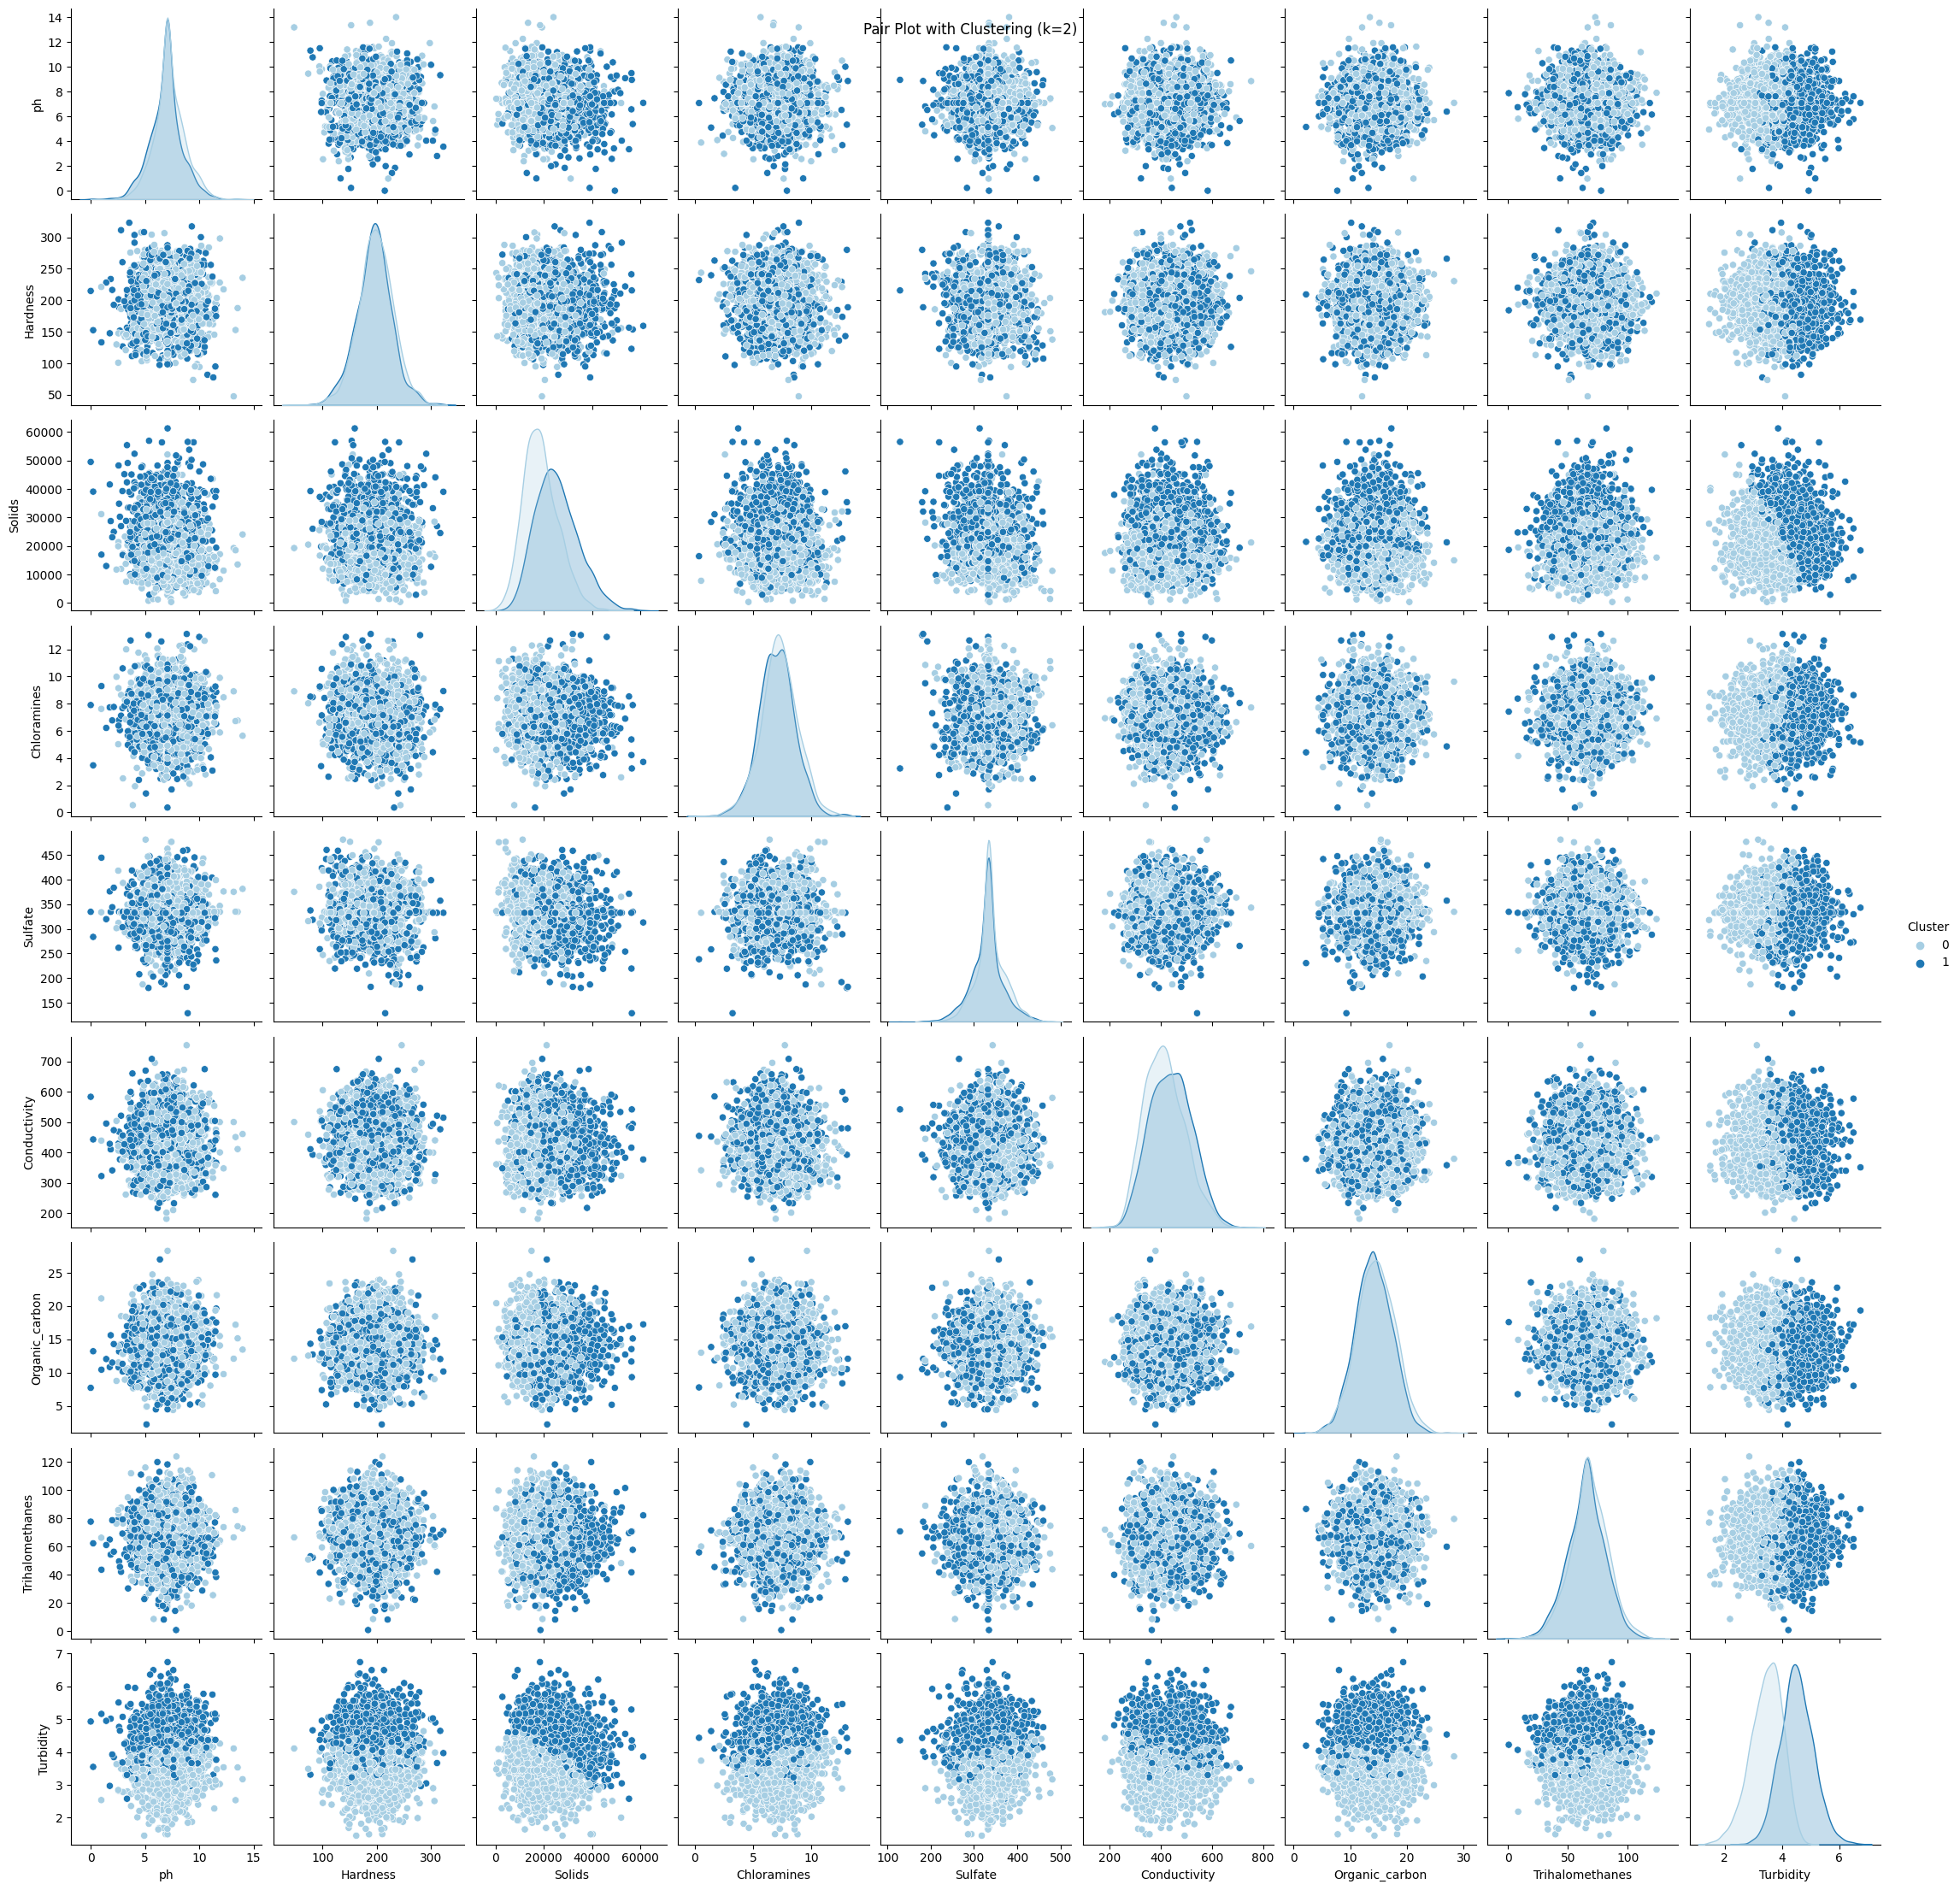

In [28]:
kmeans = KMeans(n_clusters=2, random_state=0)
cluster = kmeans.fit_predict(dataset_new)  
dataset['Cluster'] = cluster
print(dataset['Cluster'].value_counts())

sns.pairplot(data=dataset, hue='Cluster', kind='scatter', palette='Paired')
plt.suptitle('Pair Plot with Clustering (k=2)')
plt.show()

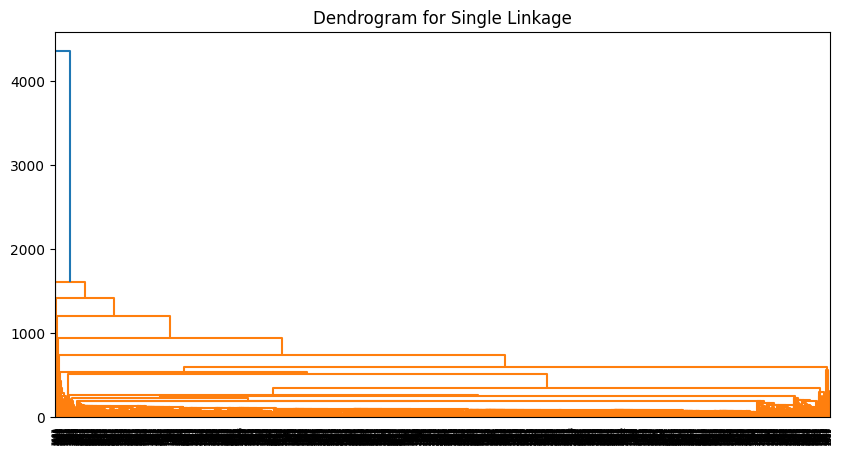

Cluster_Single
1    3275
2       1
Name: count, dtype: int64


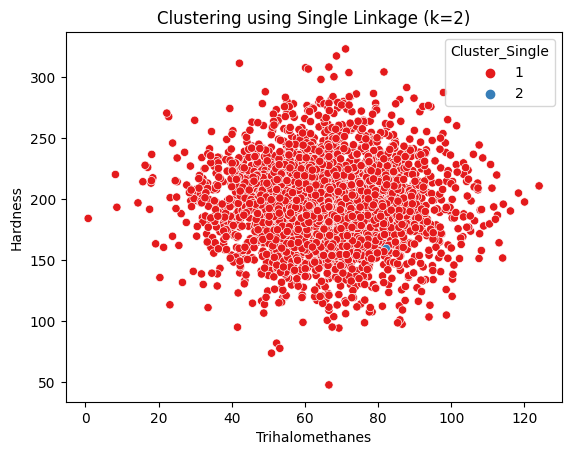

In [13]:
single_linkage = linkage(dataset, method='single')
 
plt.figure(figsize=(10, 5))
dendrogram(single_linkage)
plt.title('Dendrogram for Single Linkage')
plt.show()

single_clusters = fcluster(single_linkage, 2, criterion='maxclust') 
dataset['Cluster_Single'] = single_clusters 
print(dataset['Cluster_Single'].value_counts()) 
sns.scatterplot(data=dataset, x='Trihalomethanes', y='Hardness', hue='Cluster_Single', palette='Set1')
plt.title('Clustering using Single Linkage (k=2)')
plt.show()

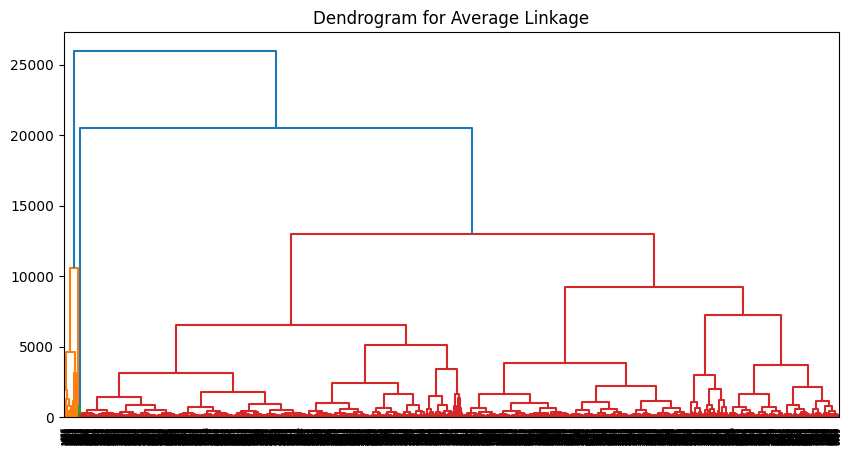

Cluster_Average
2    3211
1      65
Name: count, dtype: int64


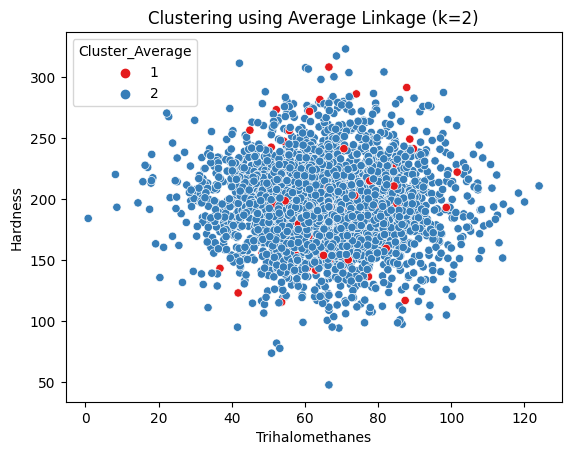

In [29]:
average_linkage = linkage(dataset, method='average') 
plt.figure(figsize=(10, 5))
dendrogram(average_linkage)
plt.title('Dendrogram for Average Linkage')
plt.show() 

average_clusters = fcluster(average_linkage, 2, criterion='maxclust')
dataset['Cluster_Average'] = average_clusters 
print(dataset['Cluster_Average'].value_counts()) 

sns.scatterplot(data=dataset, x='Trihalomethanes', y='Hardness', hue='Cluster_Average', palette='Set1')
plt.title('Clustering using Average Linkage (k=2)')
plt.show()

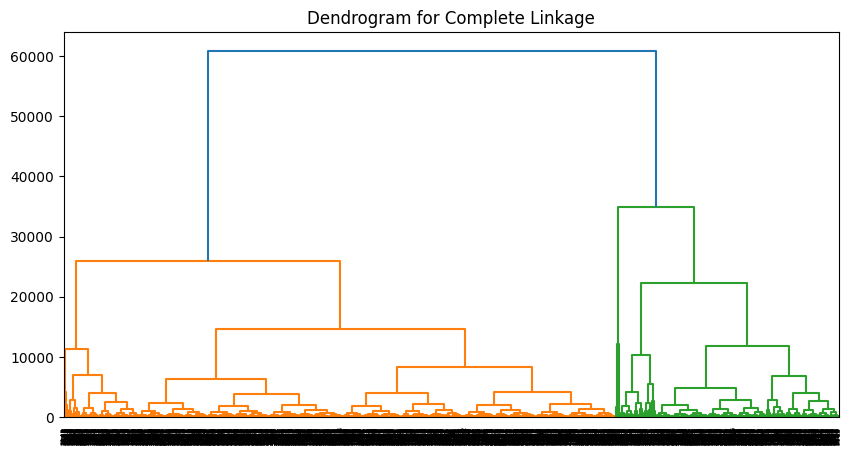

Cluster_Complete
1    2333
2     943
Name: count, dtype: int64


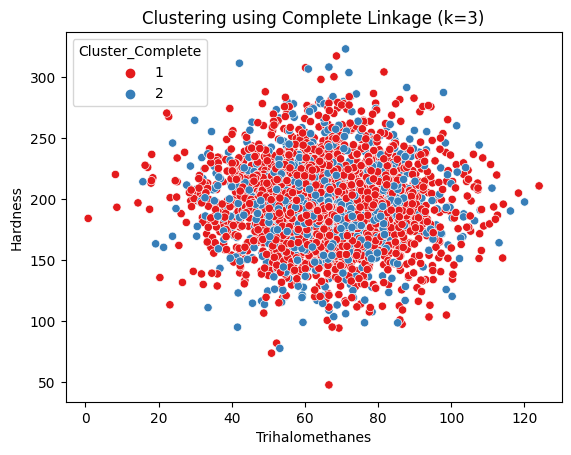

In [30]:
complete_linkage = linkage(dataset, method='complete')

plt.figure(figsize=(10, 5))
dendrogram(complete_linkage)
plt.title('Dendrogram for Complete Linkage')
plt.show()

complete_clusters = fcluster(complete_linkage, 2, criterion='maxclust')
dataset['Cluster_Complete'] = complete_clusters
print(dataset['Cluster_Complete'].value_counts())

sns.scatterplot(data=dataset, x='Trihalomethanes', y='Hardness', hue='Cluster_Complete', palette='Set1')
plt.title('Clustering using Complete Linkage (k=3)')
plt.show()